In [10]:
import InternImageSegmentation

from argparse import ArgumentParser

import mmcv

import InternImageSegmentation.mmcv_custom   # noqa: F401,F403
import InternImageSegmentation.mmseg_custom   # noqa: F401,F403
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmcv.runner import load_checkpoint
from mmseg.core import get_classes
import cv2
import os.path as osp

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# config = "/home/ken67/LiveCellTracker-dev/datasets/models/InternImage/upernet_internimage_t_512_160k_ade20k.json"
config = "/home/ken67/LiveCellTracker-dev/notebooks/InternImageSegmentation/configs/ade20k/upernet_internimage_b_512_160k_ade20k.py"
checkpoint = "/home/ken67/LiveCellTracker-dev/datasets/models/InternImage/upernet_internimage_b_512_160k_ade20k.pth"
device = "cuda"
model = init_segmentor(config, checkpoint=None, device=device)
checkpoint = load_checkpoint(model, checkpoint, map_location='cpu')


2023-03-16 14:31:59,426 - mmseg - INFO - using core type: DCNv3
2023-03-16 14:31:59,426 - mmseg - INFO - using activation layer: GELU
2023-03-16 14:31:59,426 - mmseg - INFO - using main norm layer: LN
2023-03-16 14:31:59,427 - mmseg - INFO - using dpr: linear, 0.4
2023-03-16 14:31:59,427 - mmseg - INFO - level2_post_norm: False
2023-03-16 14:31:59,427 - mmseg - INFO - level2_post_norm_block_ids: None
2023-03-16 14:31:59,428 - mmseg - INFO - res_post_norm: False


load checkpoint from local path: /home/ken67/LiveCellTracker-dev/datasets/models/InternImage/upernet_internimage_b_512_160k_ade20k.pth


In [15]:
palette = "ade20k"
opacity = 0.5
model.CLASSES = get_classes(palette)

In [11]:
img = np.zeros((512, 512, 3), dtype=np.uint8)

In [12]:
result = inference_segmentor(model, img)
plt.imshow(img)

In [20]:
from pathlib import Path
from livecell_tracker.core.datasets import LiveCellImageDataset, SingleImageDataset
from livecell_tracker.preprocess.utils import normalize_img_to_uint8


dataset_dir_path = Path(
    "../datasets/test_data_STAV-A549/DIC_data"
)

mask_dataset_path = Path("../datasets/test_data_STAV-A549/mask_data")
mask_dataset = LiveCellImageDataset(mask_dataset_path, ext="png")
dic_dataset = LiveCellImageDataset(dataset_dir_path, ext="tif")

3 png img file paths loaded: 
3 tif img file paths loaded: 


In [31]:
import torch
import torchvision.transforms

sample_img = normalize_img_to_uint8(dic_dataset[0])
sample_img = torchvision.transforms.Resize((512, 512))(torch.tensor([sample_img] * 3))
sample_img = sample_img.permute(1, 2, 0).numpy()
result = inference_segmentor(model, sample_img)

/home/ken67/anaconda3/envs/livecell/lib/python3.10/site-packages/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


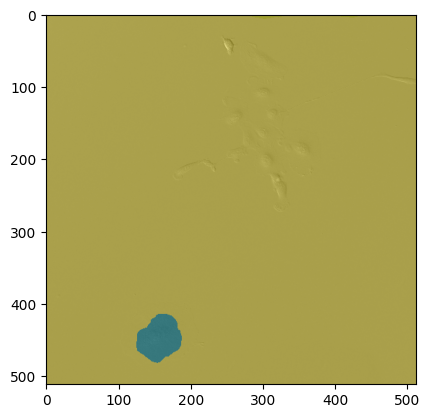

In [36]:
# show image alongside segmentation map
plt.imshow(model.show_result(sample_img, result, palette=get_palette(palette), show=False, opacity=opacity))

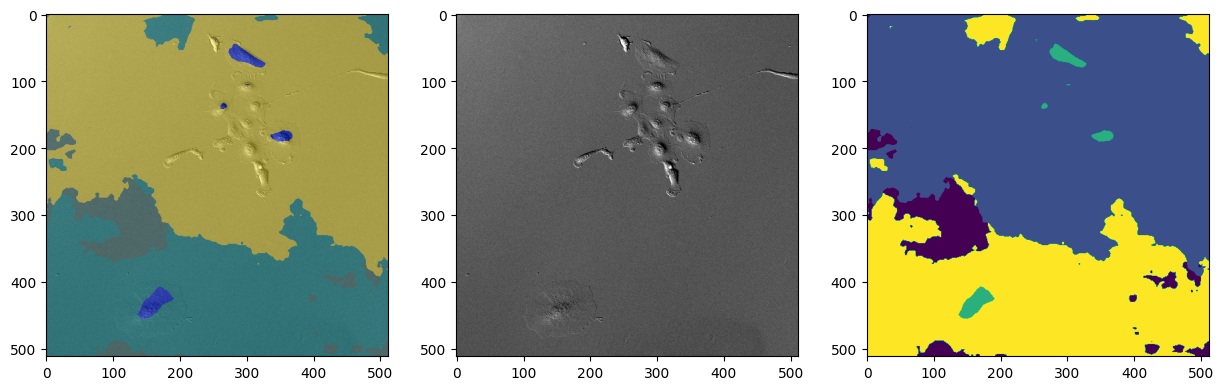

In [39]:
from livecell_tracker.preprocess.utils import enhance_contrast

enhanced_img = enhance_contrast(sample_img)
result = inference_segmentor(model, enhanced_img)

# show result overlayed image, image and segmentation map on the same row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(model.show_result(enhanced_img, result, palette=get_palette(palette), show=False, opacity=opacity)) 
axes[1].imshow(enhanced_img)
axes[2].imshow(result[0])